### Maximize $f(x,y)=x^2y$ on the set $x^2+y^2=1$

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="vwUV2IDLP8Q", width=600, height=400)

In [2]:
import numpy as np
import ipyvolume as ipv
import ipyvolume.pylab as plt3d

X = np.arange(-3, 3, 0.1)  
Y = np.arange(-3, 3, 0.1)  
X, Y = np.meshgrid(X, Y) 
Z = X**2 * Y

plt3d.figure(screen_capture_enabled=True)
plt3d.plot_surface(X, Z, Y, color="green")

plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

project the function and its contraint onto a plane

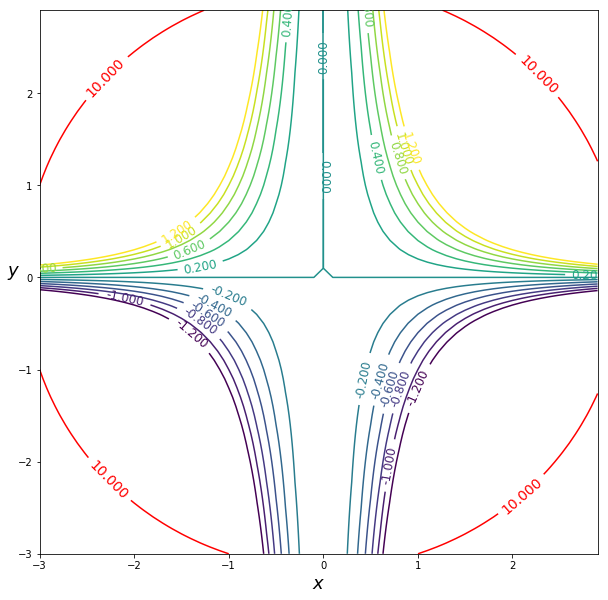

In [6]:
import matplotlib.pyplot as plt

X = np.arange(-3, 3, 0.1)  
Y = np.arange(-3, 3, 0.1)  
X, Y = np.meshgrid(X, Y)
Z = X**2 * Y 
Z0 = X**2 + Y**2

fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(X, Y, Z, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
ax.clabel(cs, fontsize=12)
cs0 = ax.contour(X, Y, Z0, levels=1, colors='r')
ax.clabel(cs0, fontsize=14)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show()  

the gradient field of optimising function

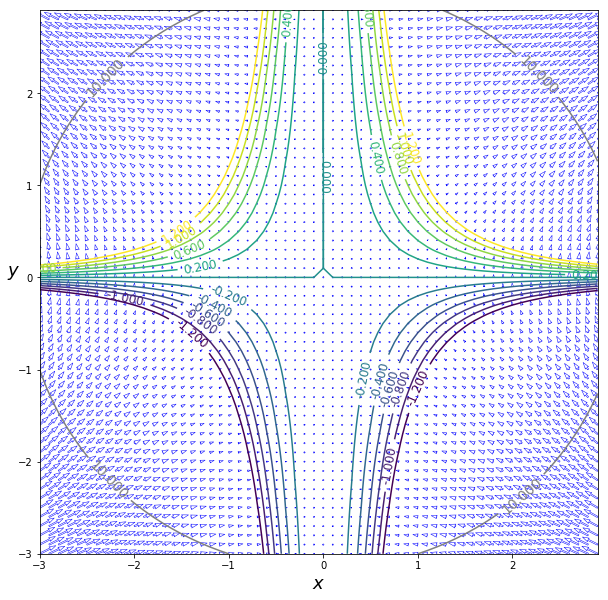

In [7]:
X1 = 2 * X * Y
X2 = X**2

fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(X, Y, Z, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
ax.clabel(cs, fontsize=12)
cs0 = ax.contour(X, Y, Z0, levels=1, colors='gray')
ax.clabel(cs0, fontsize=14)
ax.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show() 

the gradient field of constrained function

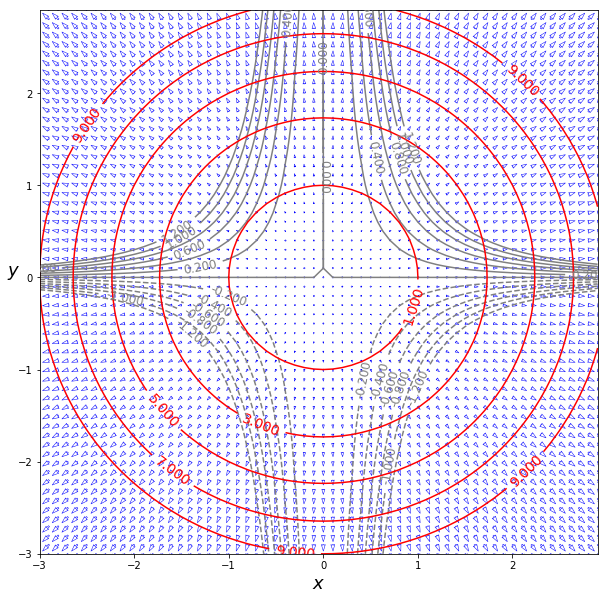

In [8]:
X1 = 2 * X
X2 = 2 * Y

fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(X, Y, Z, levels=np.arange(-1.3, 1.3, 0.1)[1::2], colors='gray')
ax.clabel(cs, fontsize=12)
cs0 = ax.contour(X, Y, Z0, levels=np.arange(0, 10, 1)[1::2], colors='r')
ax.clabel(cs0, fontsize=14)
ax.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show() 

In [9]:
import sympy
sympy.init_printing()

x, y =sympy.symbols("x, y")
f = x**2 * y
f_grad = [f.diff(i) for i in (x,y)]

g = x**2 + y**2
g_grad = [g.diff(i) for i in (x,y)]
lamb = sympy.Symbol("lambda")

lagrange_eq = sympy.Matrix(f_grad) - sympy.Matrix([lamb*g for g in g_grad])

In [10]:
res = sympy.solve([lagrange_eq[0], lagrange_eq[1], g - 1], (x, y, lamb))
res

In [11]:
res_dict = [{x:r[0], y:r[1], lamb:r[2]} for r in res]
f_values = [f.subs(r) for r in res_dict]
f_values

In [13]:
f_values1 = np.array(f_values)
res1 = np.array(res)
res_max = res1[np.where(f_values1 == max(f_values1))]
print("The maximum point:\n{}".format(res_max))

The maximum point:
[[-sqrt(6)/3 sqrt(3)/3 sqrt(3)/3]
 [sqrt(6)/3 sqrt(3)/3 sqrt(3)/3]]
